# Data visualization of universities 

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
#from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import pycountry
import pycountry_convert as pc
from geopy.geocoders import Nominatim

from bs4 import BeautifulSoup # Used for downloads the flags image
from IPython.display import display, HTML
 # Used to add flag to dataframe

from warnings import filterwarnings
filterwarnings("ignore")
plt.style.use('_mpl-gallery')

# 2. Import and Read dataset

In [2]:
# Import data
data = pd.read_csv('eighteen_nineteen_university_datasets.csv', encoding='unicode_escape')
df = pd.DataFrame(data)
df

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculty  \
0                1                    2                 1                  1   
1                2                   10                 3                  2   
2                3                    3                11                  3   
3                1                    5                19                  6   
4                2                    9                25                 10   
..             ...                  ...               ...                ...   
995              3                    -            > 1000                  -   
996             17                  353               716                296   
997             56                    -            > 1000                  -   
998             35                    -            > 1000                  -   
999            108                    -               869                  -   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995          > 1000               > 1000       464       673   69.8  
996             798                  966    > 1000    > 1000   69.8  
997          > 1000               > 1000       811       673   69.8  
998             881               > 1000    > 1000       898   69.8  
999             923                  904       889    > 1000   69.8  

[1000 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Quality of Education  1000 non-null   object 
 5   Alumni Employment     1000 non-null   object 
 6   Quality of Faculty    1000 non-null   object 
 7   Research Output       1000 non-null   object 
 8   Quality Publications  1000 non-null   object 
 9   Influence             1000 non-null   object 
 10  Citations             1000 non-null   object 
 11  Score                 1000 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


In [4]:
df.describe()

World Rank  National Rank        Score
count  1000.000000     1000.00000  1000.000000
mean    500.500000       40.02300    75.034300
std     288.819436       49.22871     4.670858
min       1.000000        1.00000    69.800000
25%     250.750000        6.00000    71.500000
50%     500.500000       21.00000    73.750000
75%     750.250000       51.00000    77.300000
max    1000.000000      213.00000   100.000000

In [5]:
df.columns.to_list()

['World Rank',
 'Institution',
 'Location',
 'National Rank',
 'Quality\xa0of Education',
 'Alumni Employment',
 'Quality\xa0of Faculty',
 'Research Output',
 'Quality Publications',
 'Influence',
 'Citations',
 'Score']

In [6]:
df.rename(columns={'Quality\xa0of Education':'Education_Quality',\
                   'Quality\xa0of Faculty':'Faculty_Quality'},inplace = True)
df.columns.to_list()

['World Rank',
 'Institution',
 'Location',
 'National Rank',
 'Education_Quality',
 'Alumni Employment',
 'Faculty_Quality',
 'Research Output',
 'Quality Publications',
 'Influence',
 'Citations',
 'Score']

# 3. Data Cleaning

In [7]:
df.isna().sum()

World Rank              0
Institution             0
Location                0
National Rank           0
Education_Quality       0
Alumni Employment       0
Faculty_Quality         0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

In [8]:
df.duplicated().sum()

0

### Based on above cells, the dataframe has no missing or duplicate values. But we will check this further to make sure. 

In [10]:
# Now, let's check for values which does not make sense
df.isin(['> 1000']).sum()

World Rank                0
Institution               0
Location                  0
National Rank             0
Education_Quality         0
Alumni Employment       509
Faculty_Quality           0
Research Output          77
Quality Publications     51
Influence               171
Citations               110
Score                     0
dtype: int64

In [11]:
#After discussing these with data owner, we decided to change these values into 1001
for cl in df.columns:
    df[cl] = df[cl].replace(['> 1000'],'1001')
df.isin(['> 1000']).sum()

World Rank              0
Institution             0
Location                0
National Rank           0
Education_Quality       0
Alumni Employment       0
Faculty_Quality         0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

In [13]:
df

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Education_Quality Alumni Employment Faculty_Quality  \
0                1                 2                 1               1   
1                2                10                 3               2   
2                3                 3                11               3   
3                1                 5                19               6   
4                2                 9                25              10   
..             ...               ...               ...             ...   
995              3                 -              1001               -   
996             17               353               716             296   
997             56                 -              1001               -   
998             35                 -              1001               -   
999            108                 -               869               -   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
..              ...                  ...       ...       ...    ...  
995            1001                 1001       464       673   69.8  
996             798                  966      1001      1001   69.8  
997            1001                 1001       811       673   69.8  
998             881                 1001      1001       898   69.8  
999             923                  904       889      1001   69.8  

[1000 rows x 12 columns]

In [14]:
df.isin(['-']).sum()

World Rank                0
Institution               0
Location                  0
National Rank             0
Education_Quality       597
Alumni Employment         0
Faculty_Quality         731
Research Output           0
Quality Publications      0
Influence                 0
Citations                 0
Score                     0
dtype: int64

In [15]:
df2 = df.replace('-',np.nan)

In [17]:
number_of_hyphen = df2.isin(['-']).sum()
number_of_hyphen

World Rank              0
Institution             0
Location                0
National Rank           0
Education_Quality       0
Alumni Employment       0
Faculty_Quality         0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

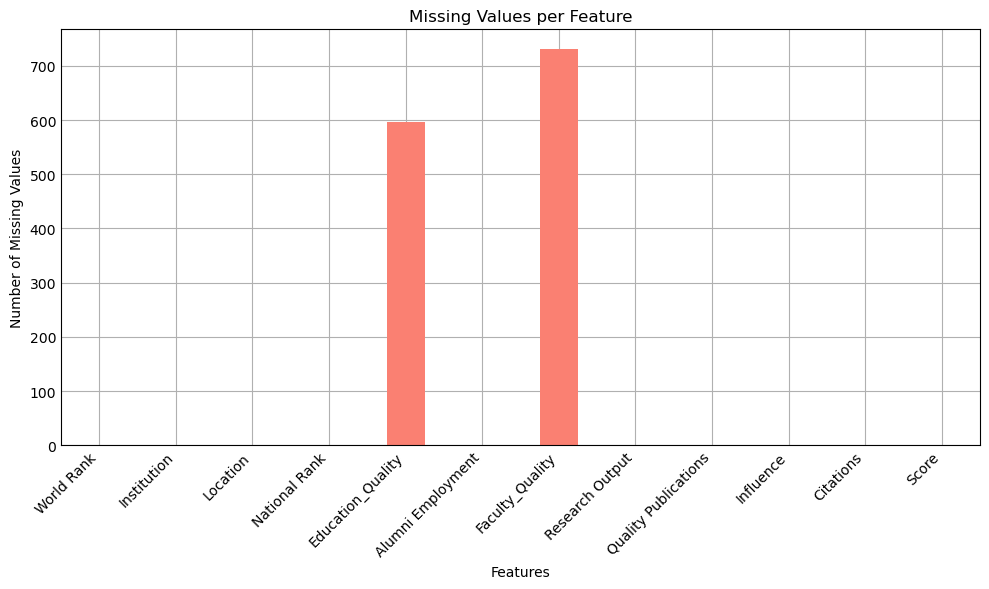

In [20]:
# Count missing values in each column
missing_value_counts = df2.isnull().sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
missing_value_counts.plot(kind='bar', color='salmon')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: >

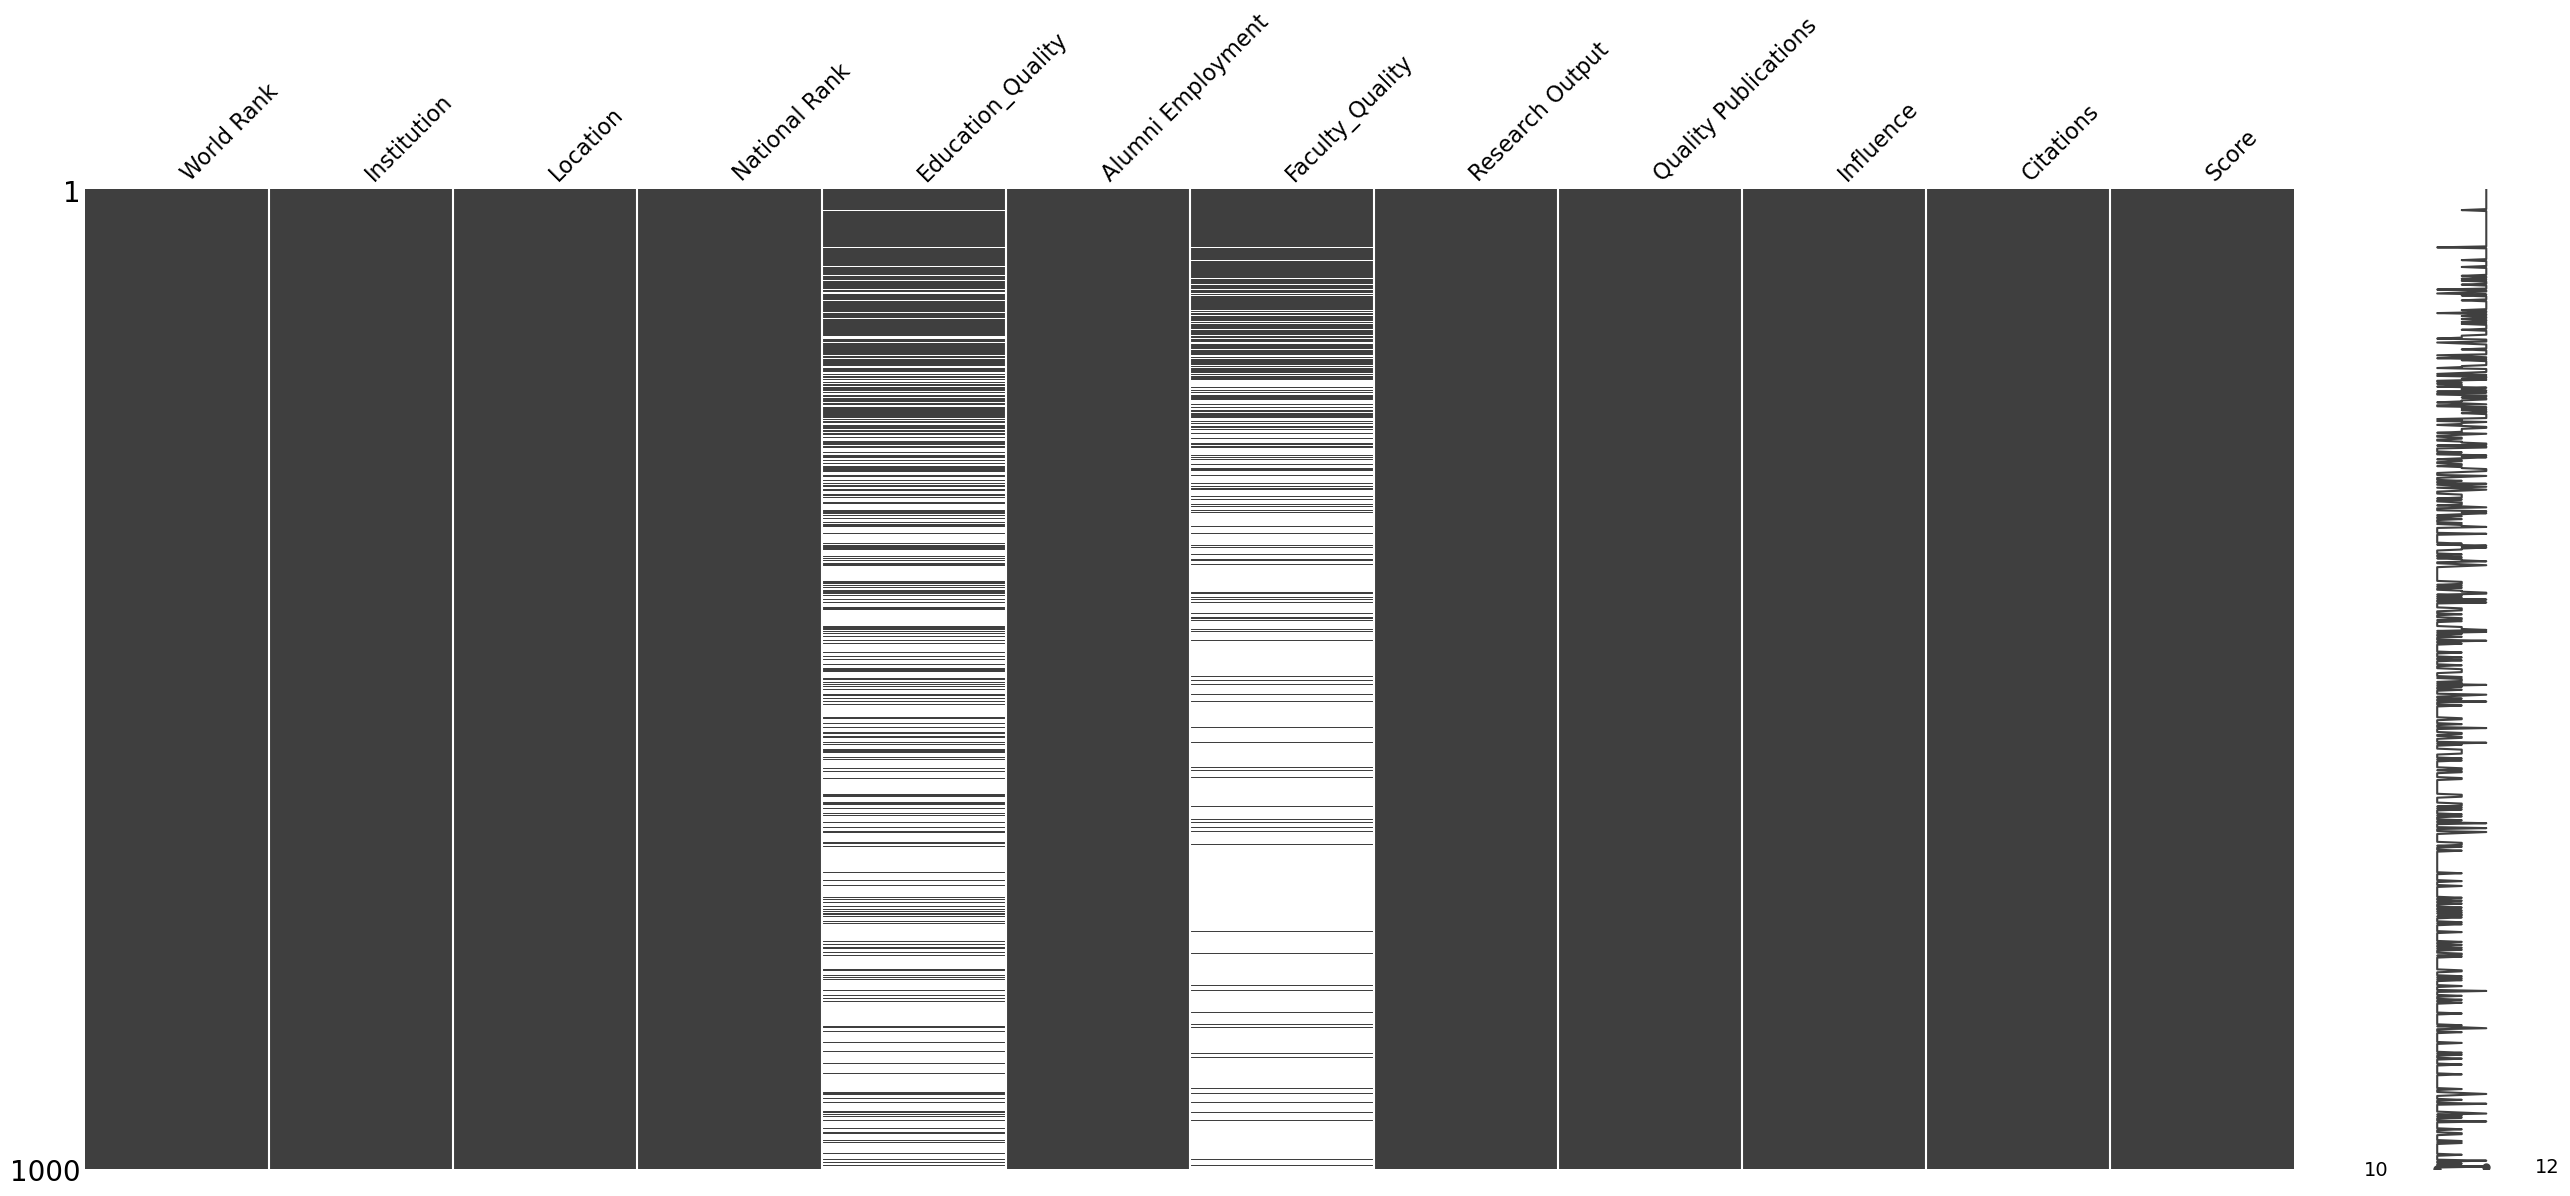

In [21]:
import missingno as msno

# Heatmap with missingno
msno.matrix(df2)  # Creates a heatmap with additional statistics


### Based on the visualization above, most of the missing values are in the higher ranks. After consulting the data owner, I decided to replace the missing values with the max+1 for each of these two categories. This prevents error in modeling and keeps the values near to the maximmum range.

<Axes: >

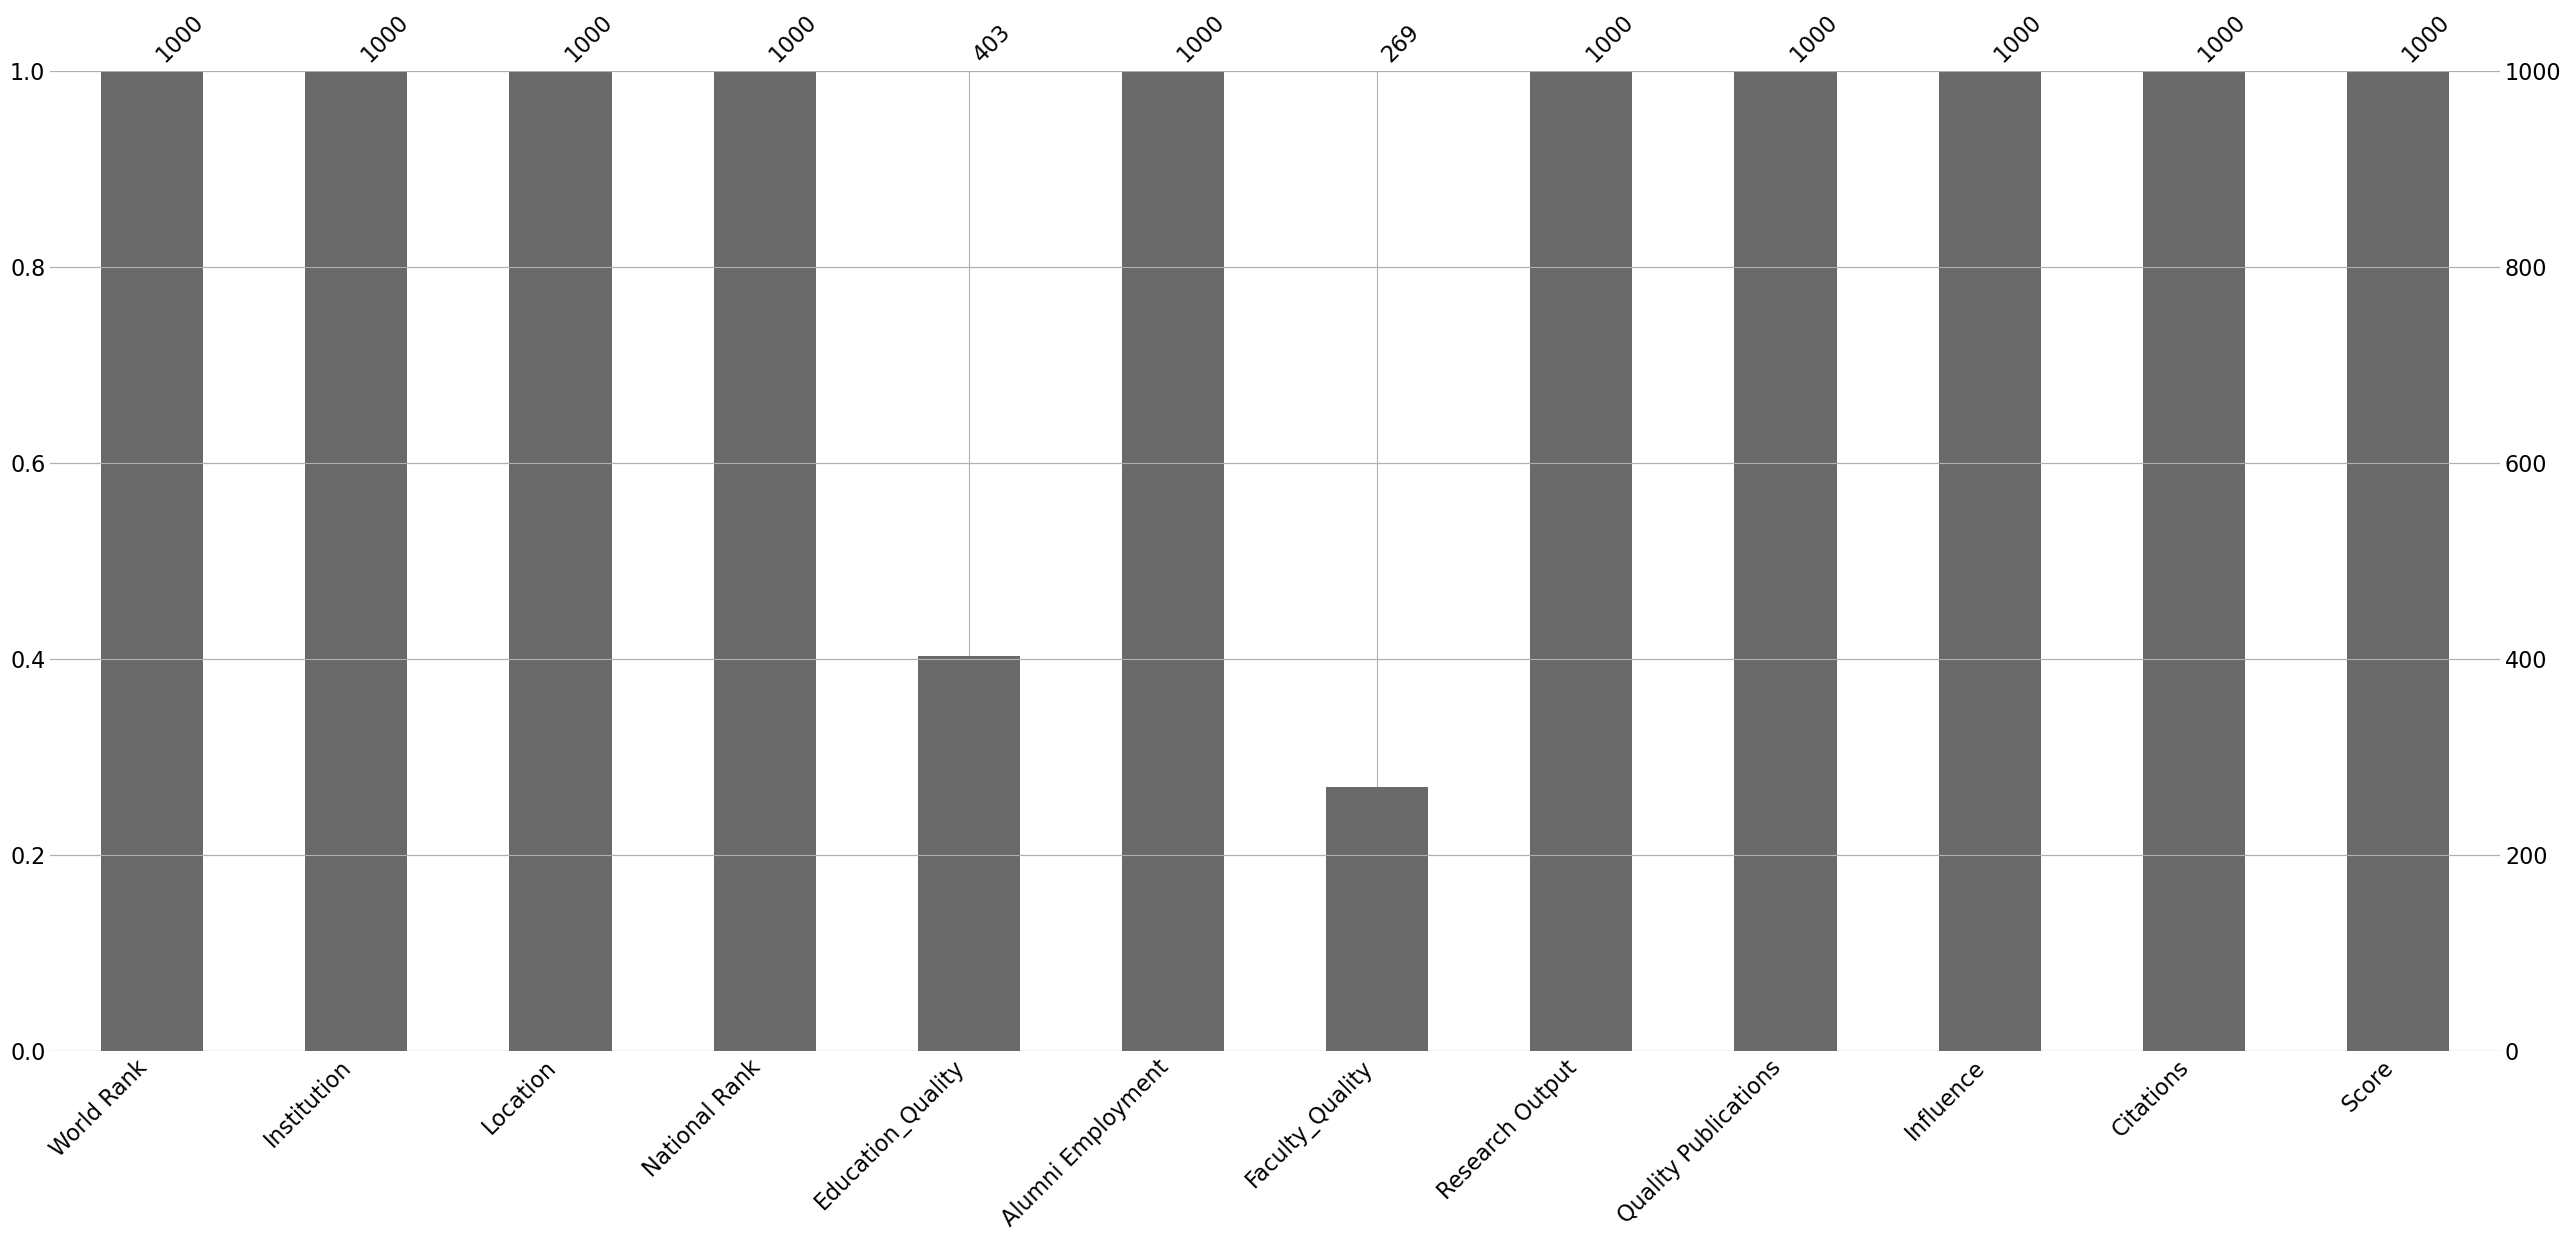

In [24]:
# Other visualizations (replace 'hist' with 'bar' or 'dendrogram' for different plots)
msno.bar(df2)  # Bar chart for missing values per feature

In [28]:
#data type conversion
# Define the columns to exclude from conversion
exclude_cols = ['Institution', 'Location']

# Select object type columns (excluding the specified ones)
numeric_cols = [col for col in df2.select_dtypes(include='object').columns if col not in exclude_cols]

# Try converting the selected columns to numeric
try:
    df2[numeric_cols] = df2[numeric_cols].astype(float)  # You can use 'int' if data is expected to be integers
except:
    print("Error: Some values in the selected columns couldn't be converted to numeric.")


# Print a sample of the DataFrame after conversion (optional)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Education_Quality     403 non-null    float64
 5   Alumni Employment     1000 non-null   float64
 6   Faculty_Quality       269 non-null    float64
 7   Research Output       1000 non-null   float64
 8   Quality Publications  1000 non-null   float64
 9   Influence             1000 non-null   float64
 10  Citations             1000 non-null   float64
 11  Score                 1000 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 93.9+ KB


In [29]:
# Get maximum values for specific columns
max_values = df2.max()

# Print formatted output for each column of interest
for col in max_values.index:
    print(f"Maximum value of '{col}' is: {max_values[col]}")

Maximum value of 'World Rank' is: 1000
Maximum value of 'Institution' is: Örebro University
Maximum value of 'Location' is: Uruguay
Maximum value of 'National Rank' is: 213
Maximum value of 'Education_Quality' is: 666.0
Maximum value of 'Alumni Employment' is: 1001.0
Maximum value of 'Faculty_Quality' is: 303.0
Maximum value of 'Research Output' is: 1001.0
Maximum value of 'Quality Publications' is: 1001.0
Maximum value of 'Influence' is: 1001.0
Maximum value of 'Citations' is: 1001.0
Maximum value of 'Score' is: 100.0


In [30]:
# Define the replacement values
replacement_values = {'Education_Quality': 667, 'Faculty_Quality': 304}  # Replace X and Y with your desired values

# Create a copy of the DataFrame (avoid modifying the original)
df2_updated = df2.copy()

# Replace missing values using a dictionary
df2_updated = df2_updated.fillna(replacement_values)

# Print the DataFrame with missing values replaced (in the copy)
print(df2_updated)


     World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
..          ...                                    ...             ...   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank  Education_Quality  Alumni Employment  Faculty_Quality  \
0                1                

In [33]:
#Now that we have made the required changes in the dataframe, we can consider it as final dataframe
df_final = df2_updated
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   World Rank            1000 non-null   int64  
 1   Institution           1000 non-null   object 
 2   Location              1000 non-null   object 
 3   National Rank         1000 non-null   int64  
 4   Education_Quality     1000 non-null   float64
 5   Alumni Employment     1000 non-null   float64
 6   Faculty_Quality       1000 non-null   float64
 7   Research Output       1000 non-null   float64
 8   Quality Publications  1000 non-null   float64
 9   Influence             1000 non-null   float64
 10  Citations             1000 non-null   float64
 11  Score                 1000 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 93.9+ KB


# 4. EDA

In [34]:
# Get unique countries as a Series
unique_countries = df_final['Location'].unique()

# Convert Series to list (optional)
country_list = unique_countries.tolist()

# Print the results
print("List of unique countries:")
print(country_list)


List of unique countries:
['USA', 'United Kingdom', 'Japan', 'Canada', 'Switzerland', 'France', 'Denmark', 'Israel', 'Germany', 'Sweden', 'Australia', 'South Korea', 'Italy', 'Netherlands', 'Norway', 'Brazil', 'Spain', 'China', 'Finland', 'Singapore', 'Belgium', 'Taiwan', 'Russia', 'Hong Kong', 'Austria', 'Czech Republic', 'Portugal', 'South Africa', 'Ireland', 'New Zealand', 'Mexico', 'Poland', 'Argentina', 'Greece', 'Saudi Arabia', 'Chile', 'Serbia', 'Slovenia', 'Iran', 'Hungary', 'India', 'Malaysia', 'Egypt', 'Croatia', 'Thailand', 'Iceland', 'Estonia', 'Turkey', 'Slovak Republic', 'Uruguay', 'Lithuania', 'Colombia', 'Uganda', 'Lebanon', 'Pakistan', 'Romania', 'Bulgaria', 'Cyprus', 'Tunisia', 'Nigeria', 'Macau']


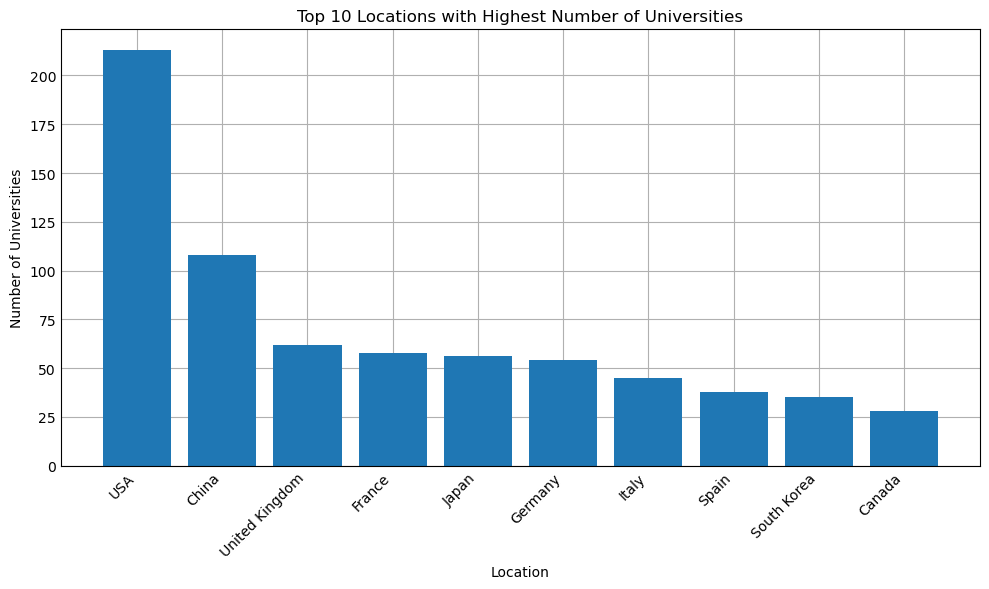

In [35]:
## Visualize Countries Based on Number of Universities

# Get the number of universities for each location (value counts)
location_counts = df_final['Location'].value_counts()

# Get the top 10 locations with the largest number of universities (adjust as needed)
top_10_locations = location_counts.nlargest(10).index.tolist()  # Get location names
top_10_counts = location_counts.nlargest(10).tolist()  # Get corresponding counts

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_locations, top_10_counts)
plt.xlabel('Location')
plt.ylabel('Number of Universities')
plt.title('Top 10 Locations with Highest Number of Universities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




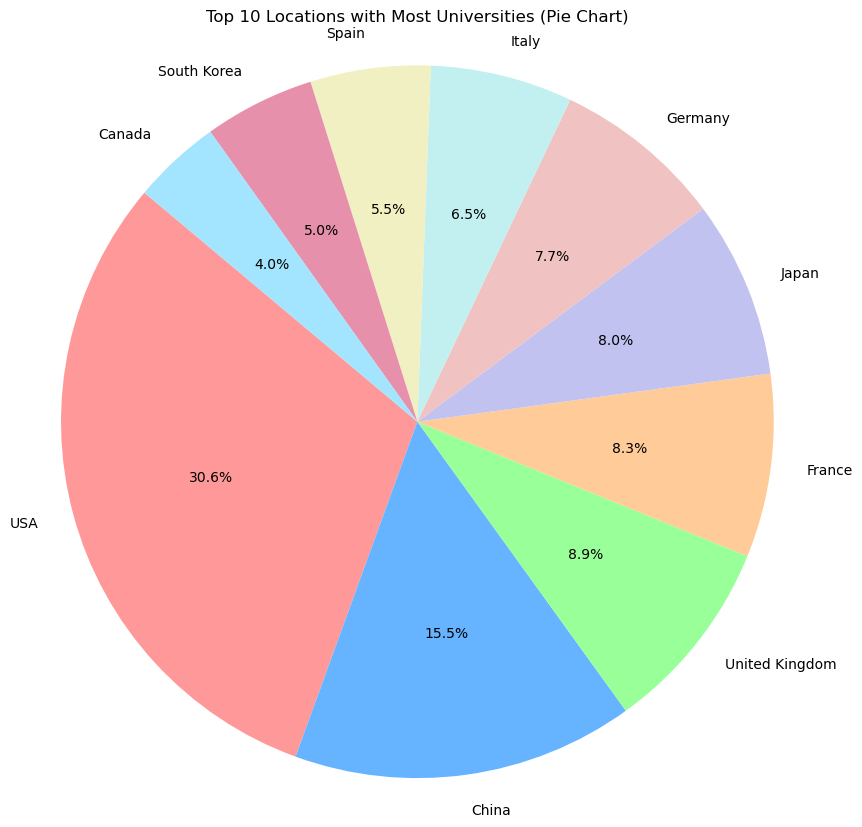

In [19]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#f0c2c2', '#c2f0f0', '#f0f0c2', '#e690ac', '#a3e4ff']
# ---------- Pie Chart ----------
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(top_10_counts, labels=top_10_locations, autopct="%1.1f%%", startangle=140, colors=colors)  # Use colors list
plt.title('Top 10 Locations with Most Universities (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

plt.show()

In [36]:
def visualize_top_universities(df, feature, color, num_universities=10, title="Top Universities by", filename=None):
  """
  This function visualizes the top `num_universities` with the highest value in a specified `feature` of a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      feature (str): The name of the feature to visualize.
      num_universities (int, optional): The number of universities to display (default: 10).
      title (str, optional): The title of the plot (default: "Top Universities by").
      color (str, optional): The color of the bars in the chart.
      filename (str, optional): The filename to save the plot as (default: None).
  """

  # Sort DataFrame by the feature in descending order
  df_sorted = df.sort_values(by=feature).head(num_universities)

  # Extract data for plotting
  institutions = df_sorted['Institution']
  feature_values = df_sorted[feature]

  # Create the bar chart
  plt.figure(figsize=(10, 6))
  plt.barh(institutions, feature_values, color=color) 
  plt.xlabel( f" {feature} rank")
  plt.ylabel('University')
  plt.title(title + f" {feature}")
  plt.gca().invert_yaxis()  # Invert y-axis to display top at the top
  plt.tight_layout()

  # Save plot (if filename provided)
  if filename:
    plt.savefig(filename)

  # Display the plot
  plt.show()

### In this dataset, the different values including citation, teaching, etc. are reported as relative rank. So, in the below graphs, you can see the list of top 10 institutions in terms of each factor. They are sorted from rank 1 to 10 in each category.

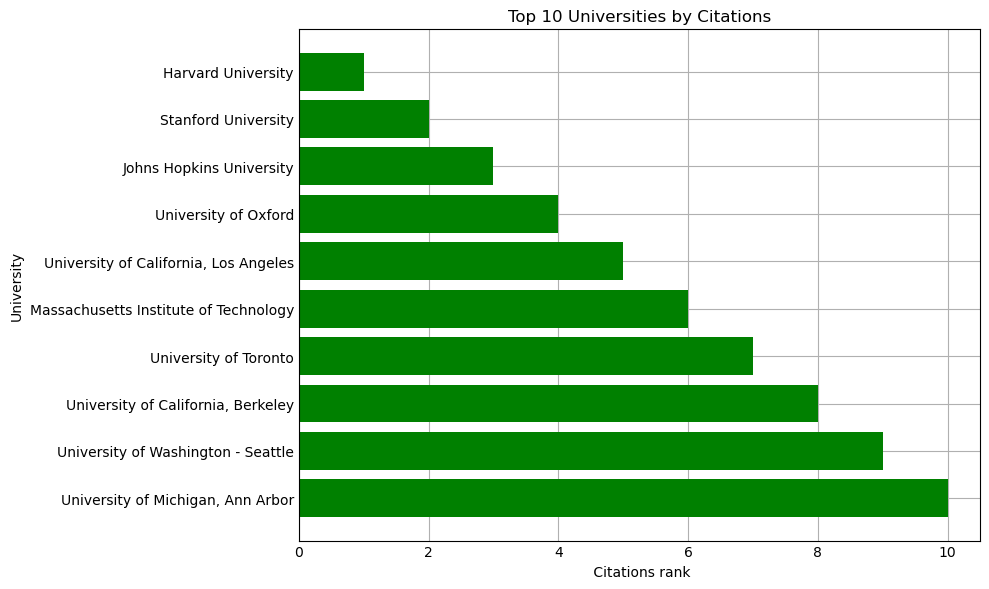

In [37]:
visualize_top_universities(df_final.copy(), 'Citations', color = 'green', title="Top 10 Universities by")

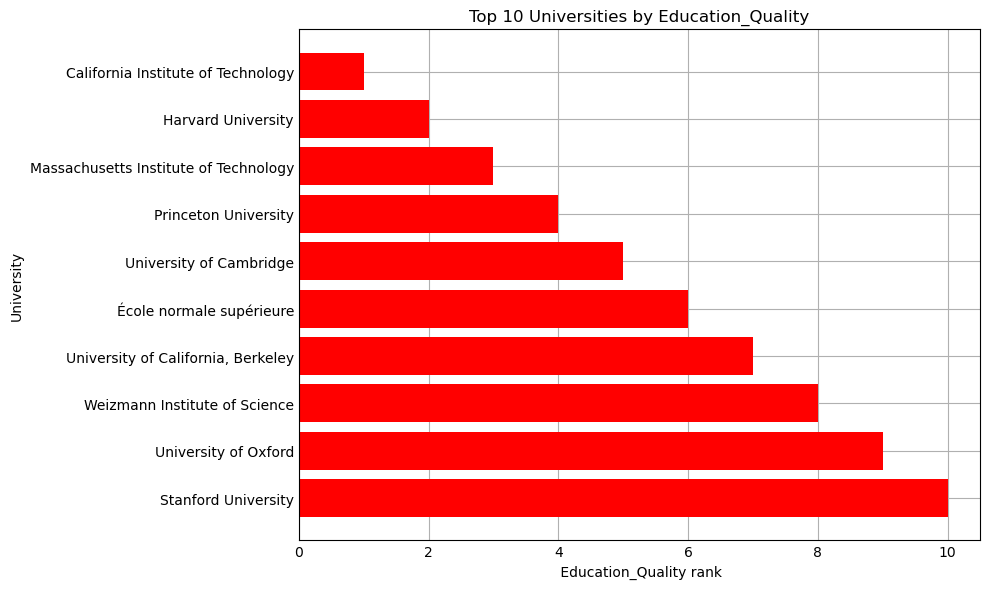

In [38]:
visualize_top_universities(df_final.copy(), 'Education_Quality', color = 'red', title="Top 10 Universities by")

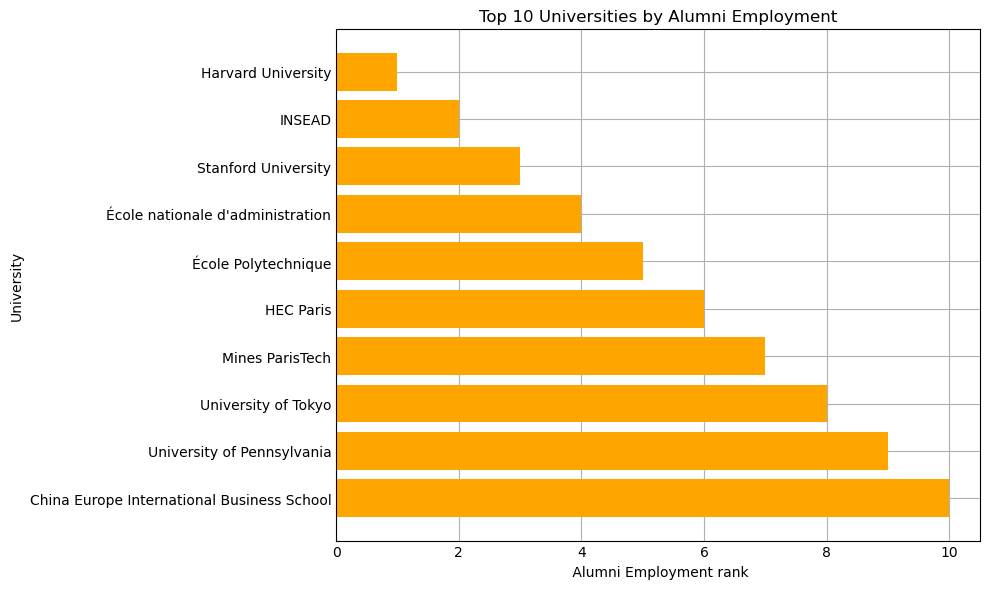

In [39]:
visualize_top_universities(df_final.copy(), 'Alumni Employment', color = 'orange', title="Top 10 Universities by")

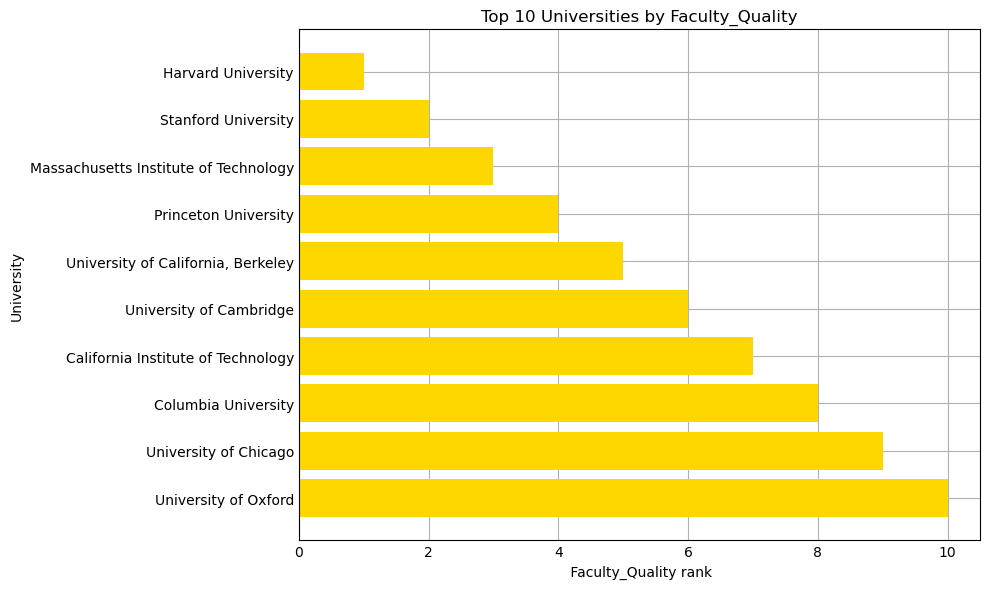

In [40]:
visualize_top_universities(df_final.copy(), 'Faculty_Quality', color = 'gold', title="Top 10 Universities by")

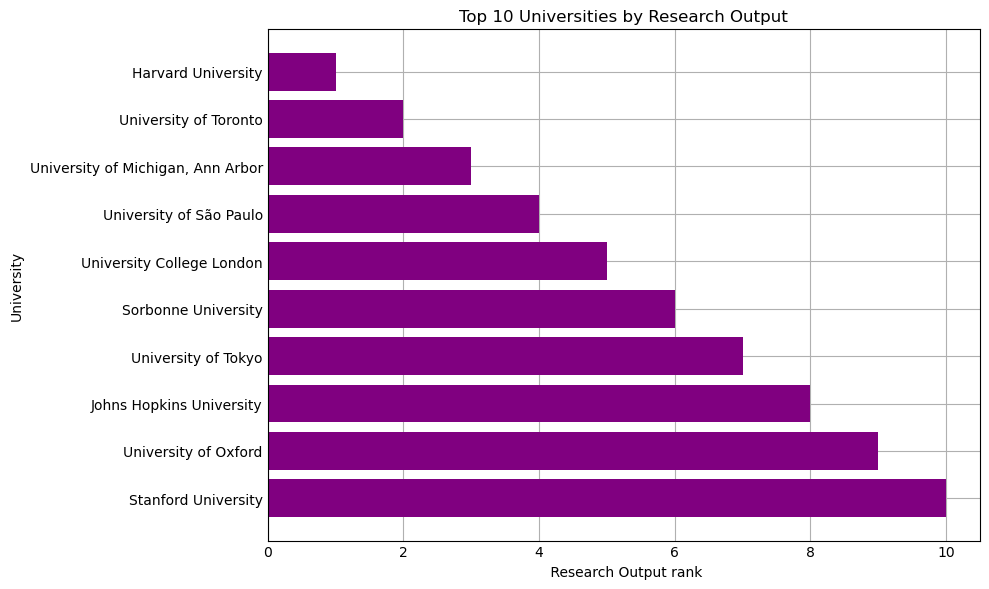

In [41]:
visualize_top_universities(df_final.copy(), 'Research Output', color = 'purple', title="Top 10 Universities by")

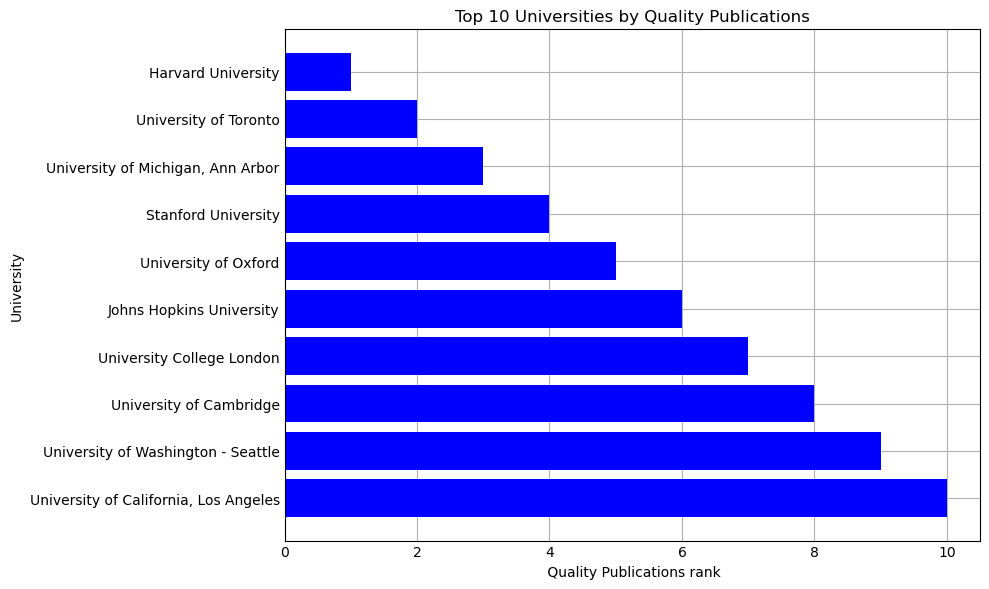

In [42]:
visualize_top_universities(df_final.copy(), 'Quality Publications', color = 'blue', title="Top 10 Universities by")

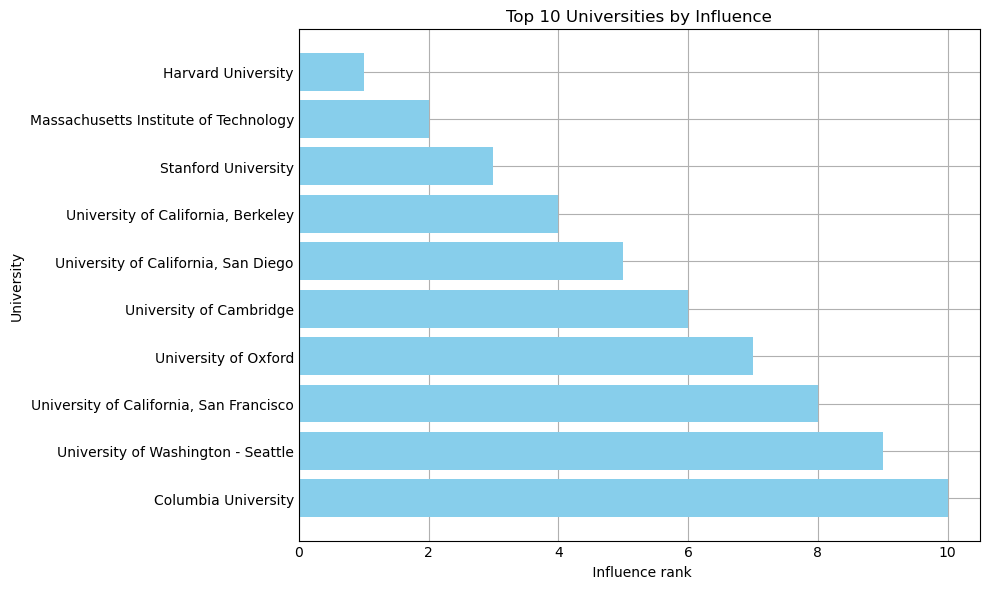

In [43]:
visualize_top_universities(df_final.copy(), 'Influence', color = 'skyblue', title="Top 10 Universities by")

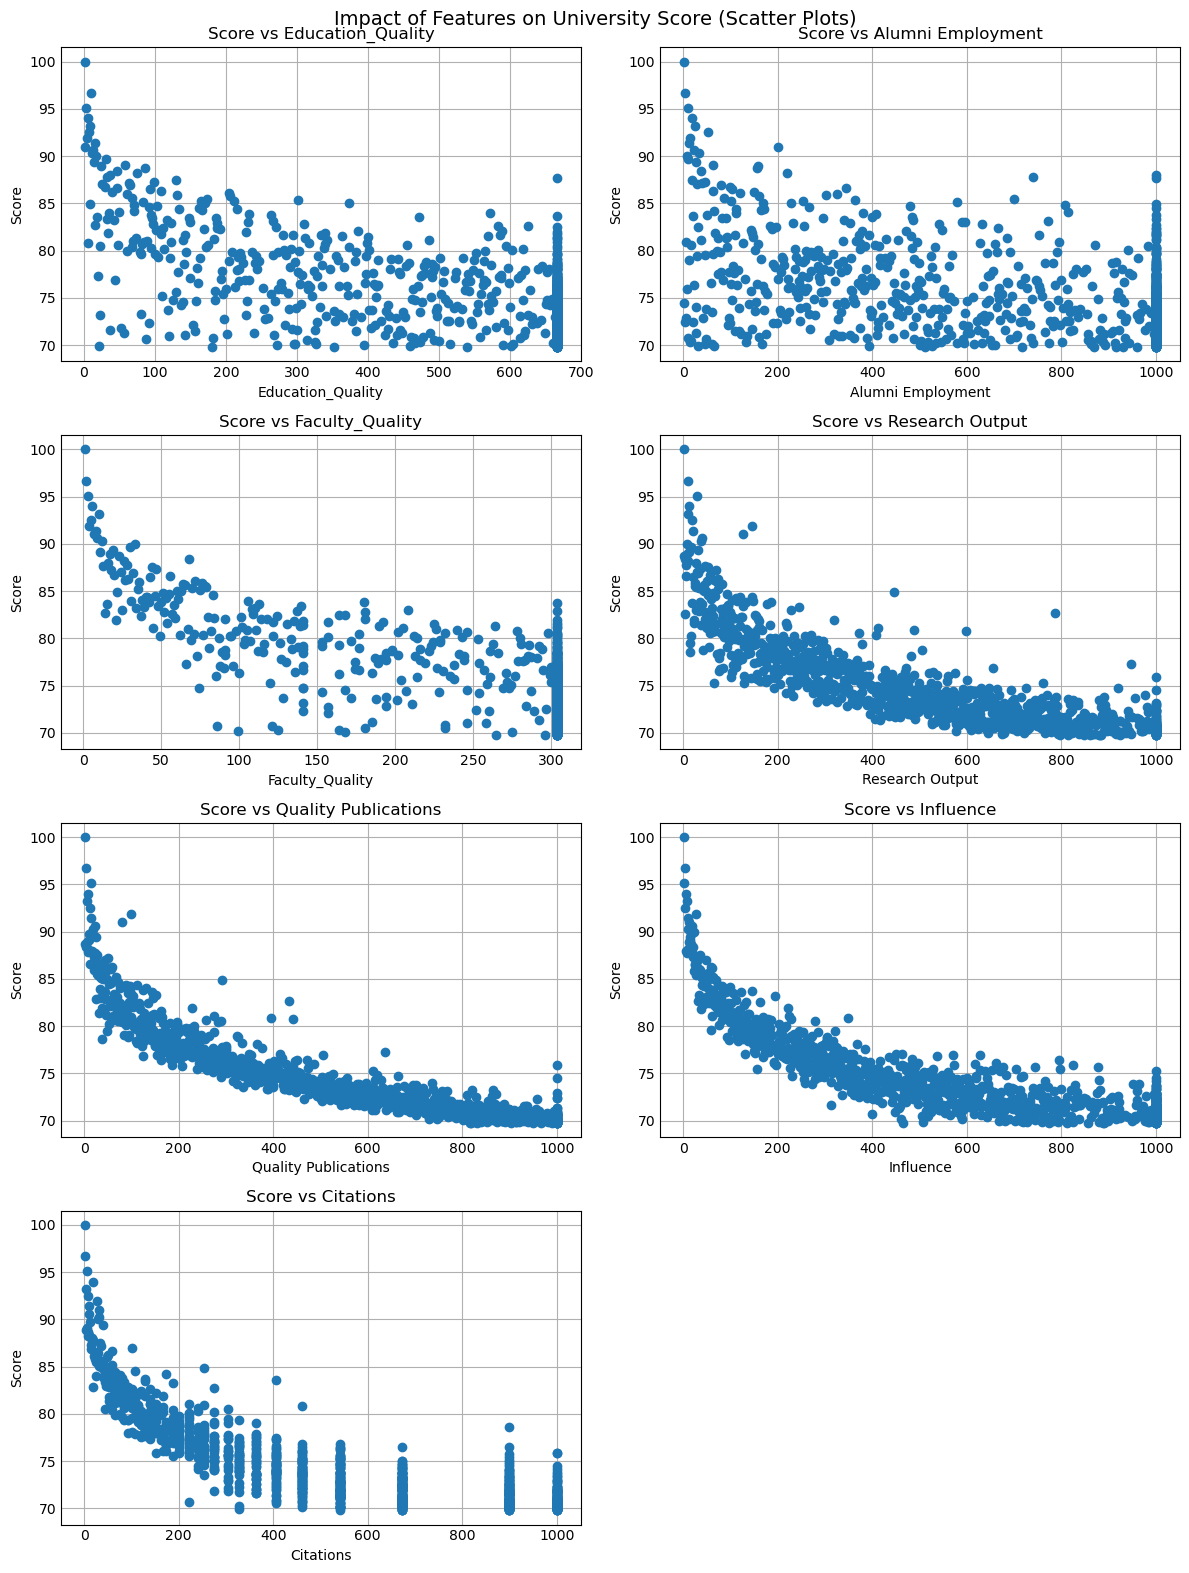

In [45]:
# Features to visualize (excluding National Rank and Score)
features_to_visualize = ['Education_Quality', 'Alumni Employment', 'Faculty_Quality', 'Research Output', 'Quality Publications',
                          'Influence', 'Citations']

# Calculate number of rows considering the number of features (2 columns per row)
num_features = len(features_to_visualize)
rows = (num_features + 1) // 2  # Integer division with ceiling (avoid extra row)

# Create the figure for subplots (adjust figsize as needed)
fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 4))  # Adjust figsize based on rows

# Iterate through features and create scatter plots
feature_index = 0
for i in range(rows):
  for j in range(2):  # Maximum of 2 columns per row
    if feature_index >= num_features:
      break  # No more features, exit loop
    current_feature = features_to_visualize[feature_index]

    # Scatter plot for current feature vs Score
    axes[i, j].scatter(df_final[current_feature], df_final['Score'])
    axes[i, j].set_xlabel(current_feature)
    axes[i, j].set_ylabel('Score')
    axes[i, j].set_title(f'Score vs {current_feature}')

    feature_index += 1

# Hide extra subplots (if any)
if num_features % 2 != 0:  # Check if there's an extra subplot (odd number of features)
  axes[-1, -1].axis('off')  # Hide the last subplot (assuming 2 columns per row)

# Adjust layout and display the plot
plt.suptitle('Impact of Features on University Score (Scatter Plots)', fontsize=14)
plt.tight_layout()
plt.show()

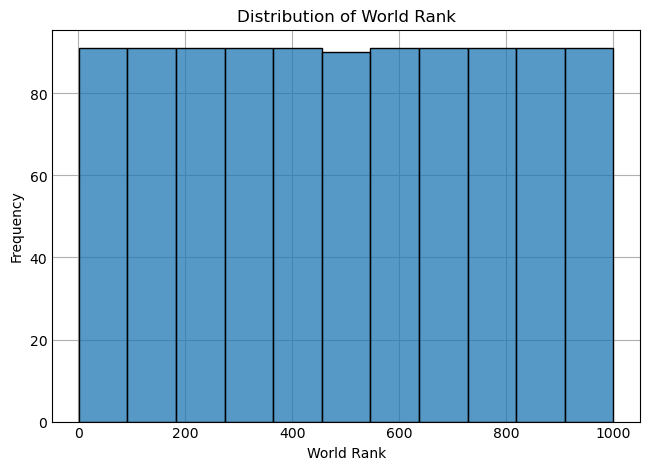

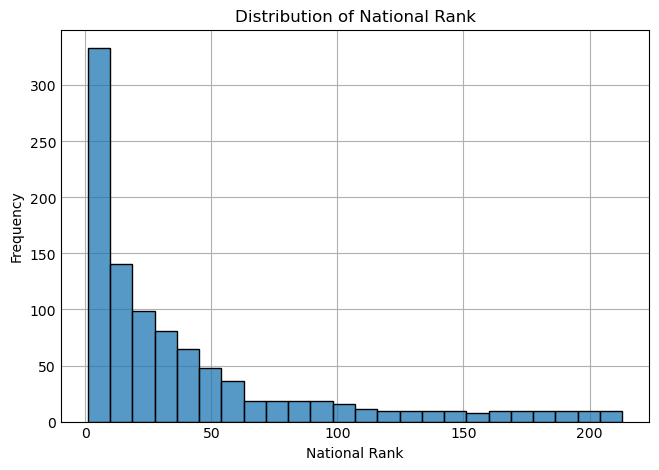

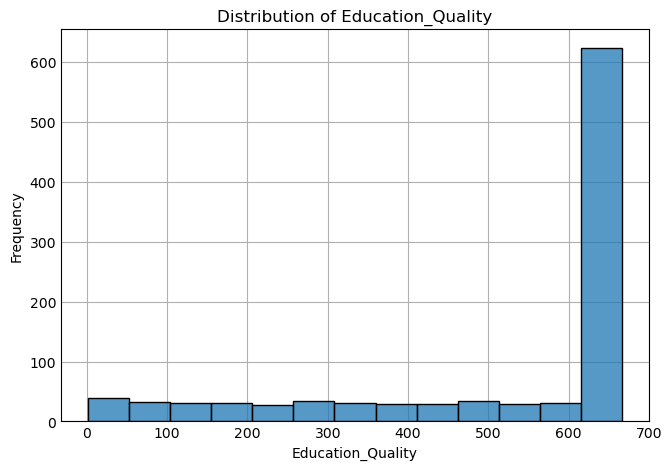

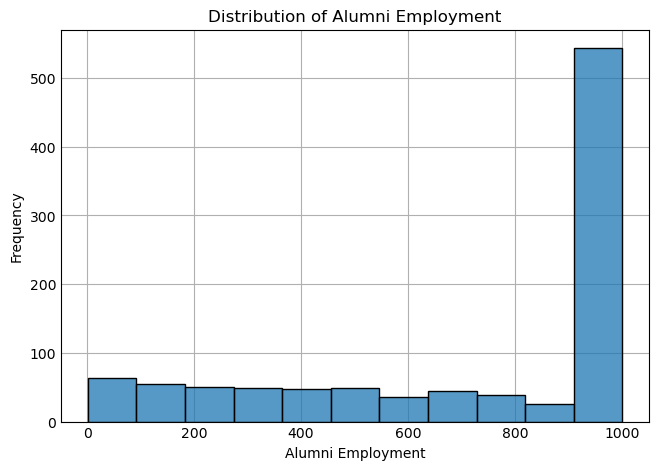

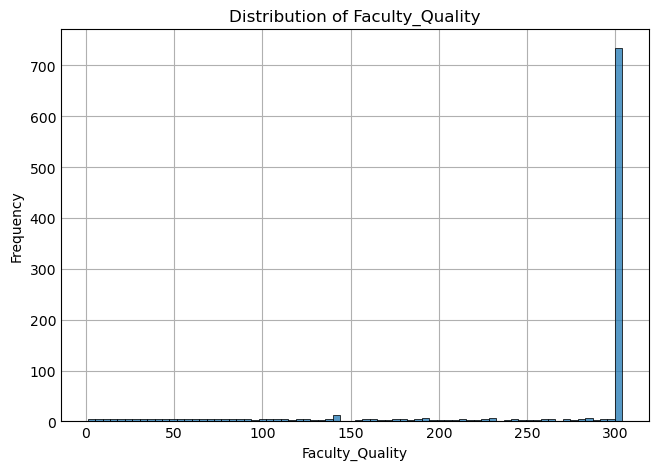

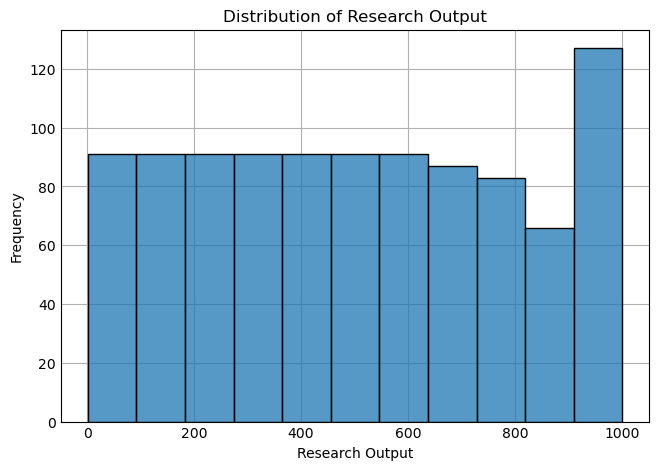

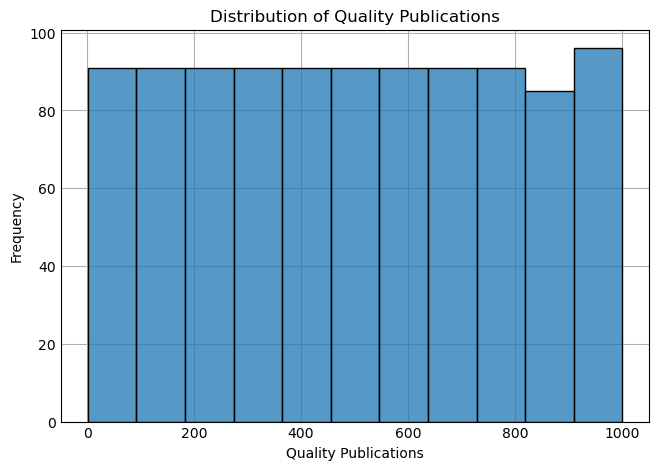

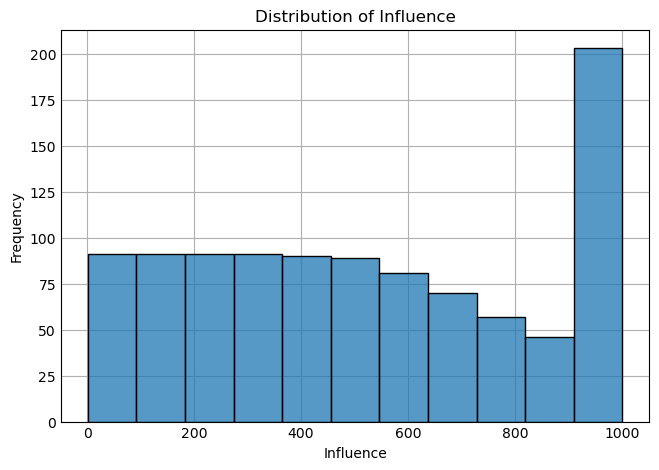

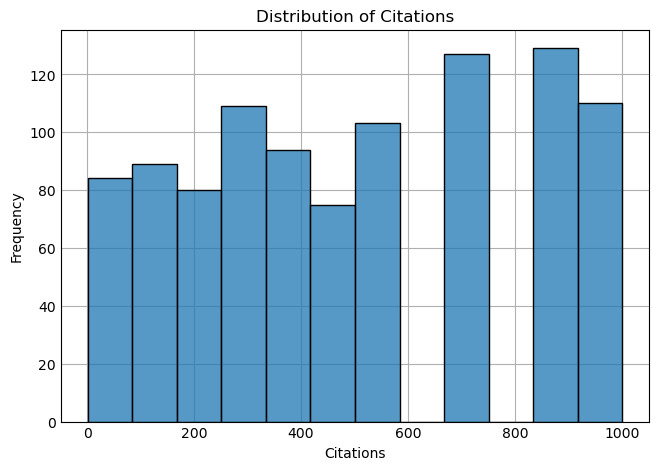

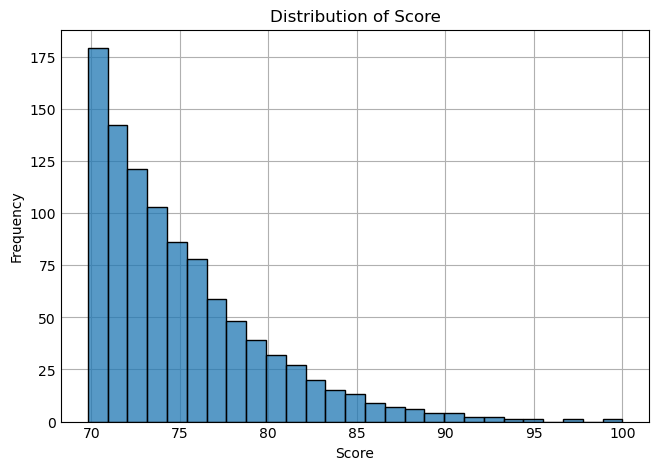

In [46]:
# Iterate through numeric features and create histplots
for col in df_final.select_dtypes(include=[np.number]).columns:
  plt.figure(figsize = (6,4))

  sns.histplot(data=df_final, x=col)  # histplot for each numeric column
  plt.title(f'Distribution of {col}')  # Add title for each subplot
  plt.xlabel(col)  # Set x-axis label
  plt.ylabel('Frequency')  # Set y-axis label
  plt.show()  # Show the histplot (repeat for each column)


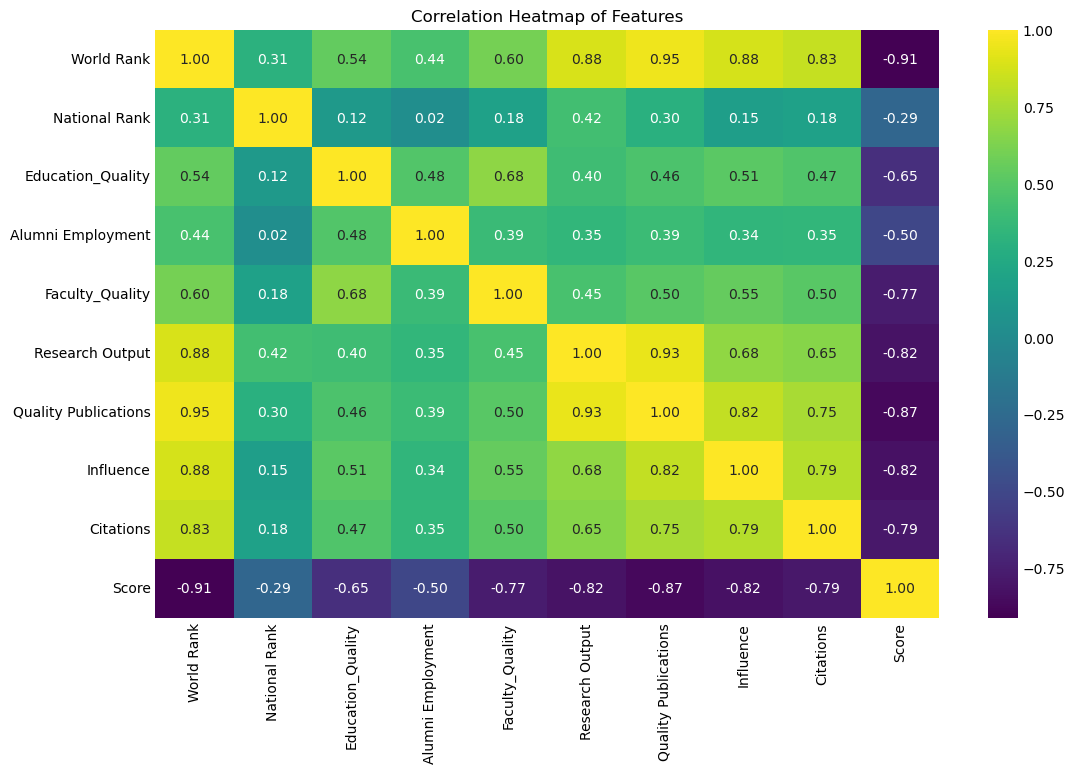

In [47]:
  # Select only numerical or categorical features (excluding object type)
correlation_matrix = df_final.select_dtypes(include=[np.number]).corr()

  # Create a heatmap using seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
fmt = ".2f"  # Format string to display two decimal places
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=fmt)

  # Customize the plot (optional)
plt.title("Correlation Heatmap of Features")
plt.show()

### based on the heatmap above, the score has the highest correlation with quality publications, influence, and citations. However, it's worth noting that the values assigned to these columns represent the rank, not the actual number of citations, influence, etc. Therefore, the lower the rank, the better. This inverse relationship is why these factors are conversely related to the score.

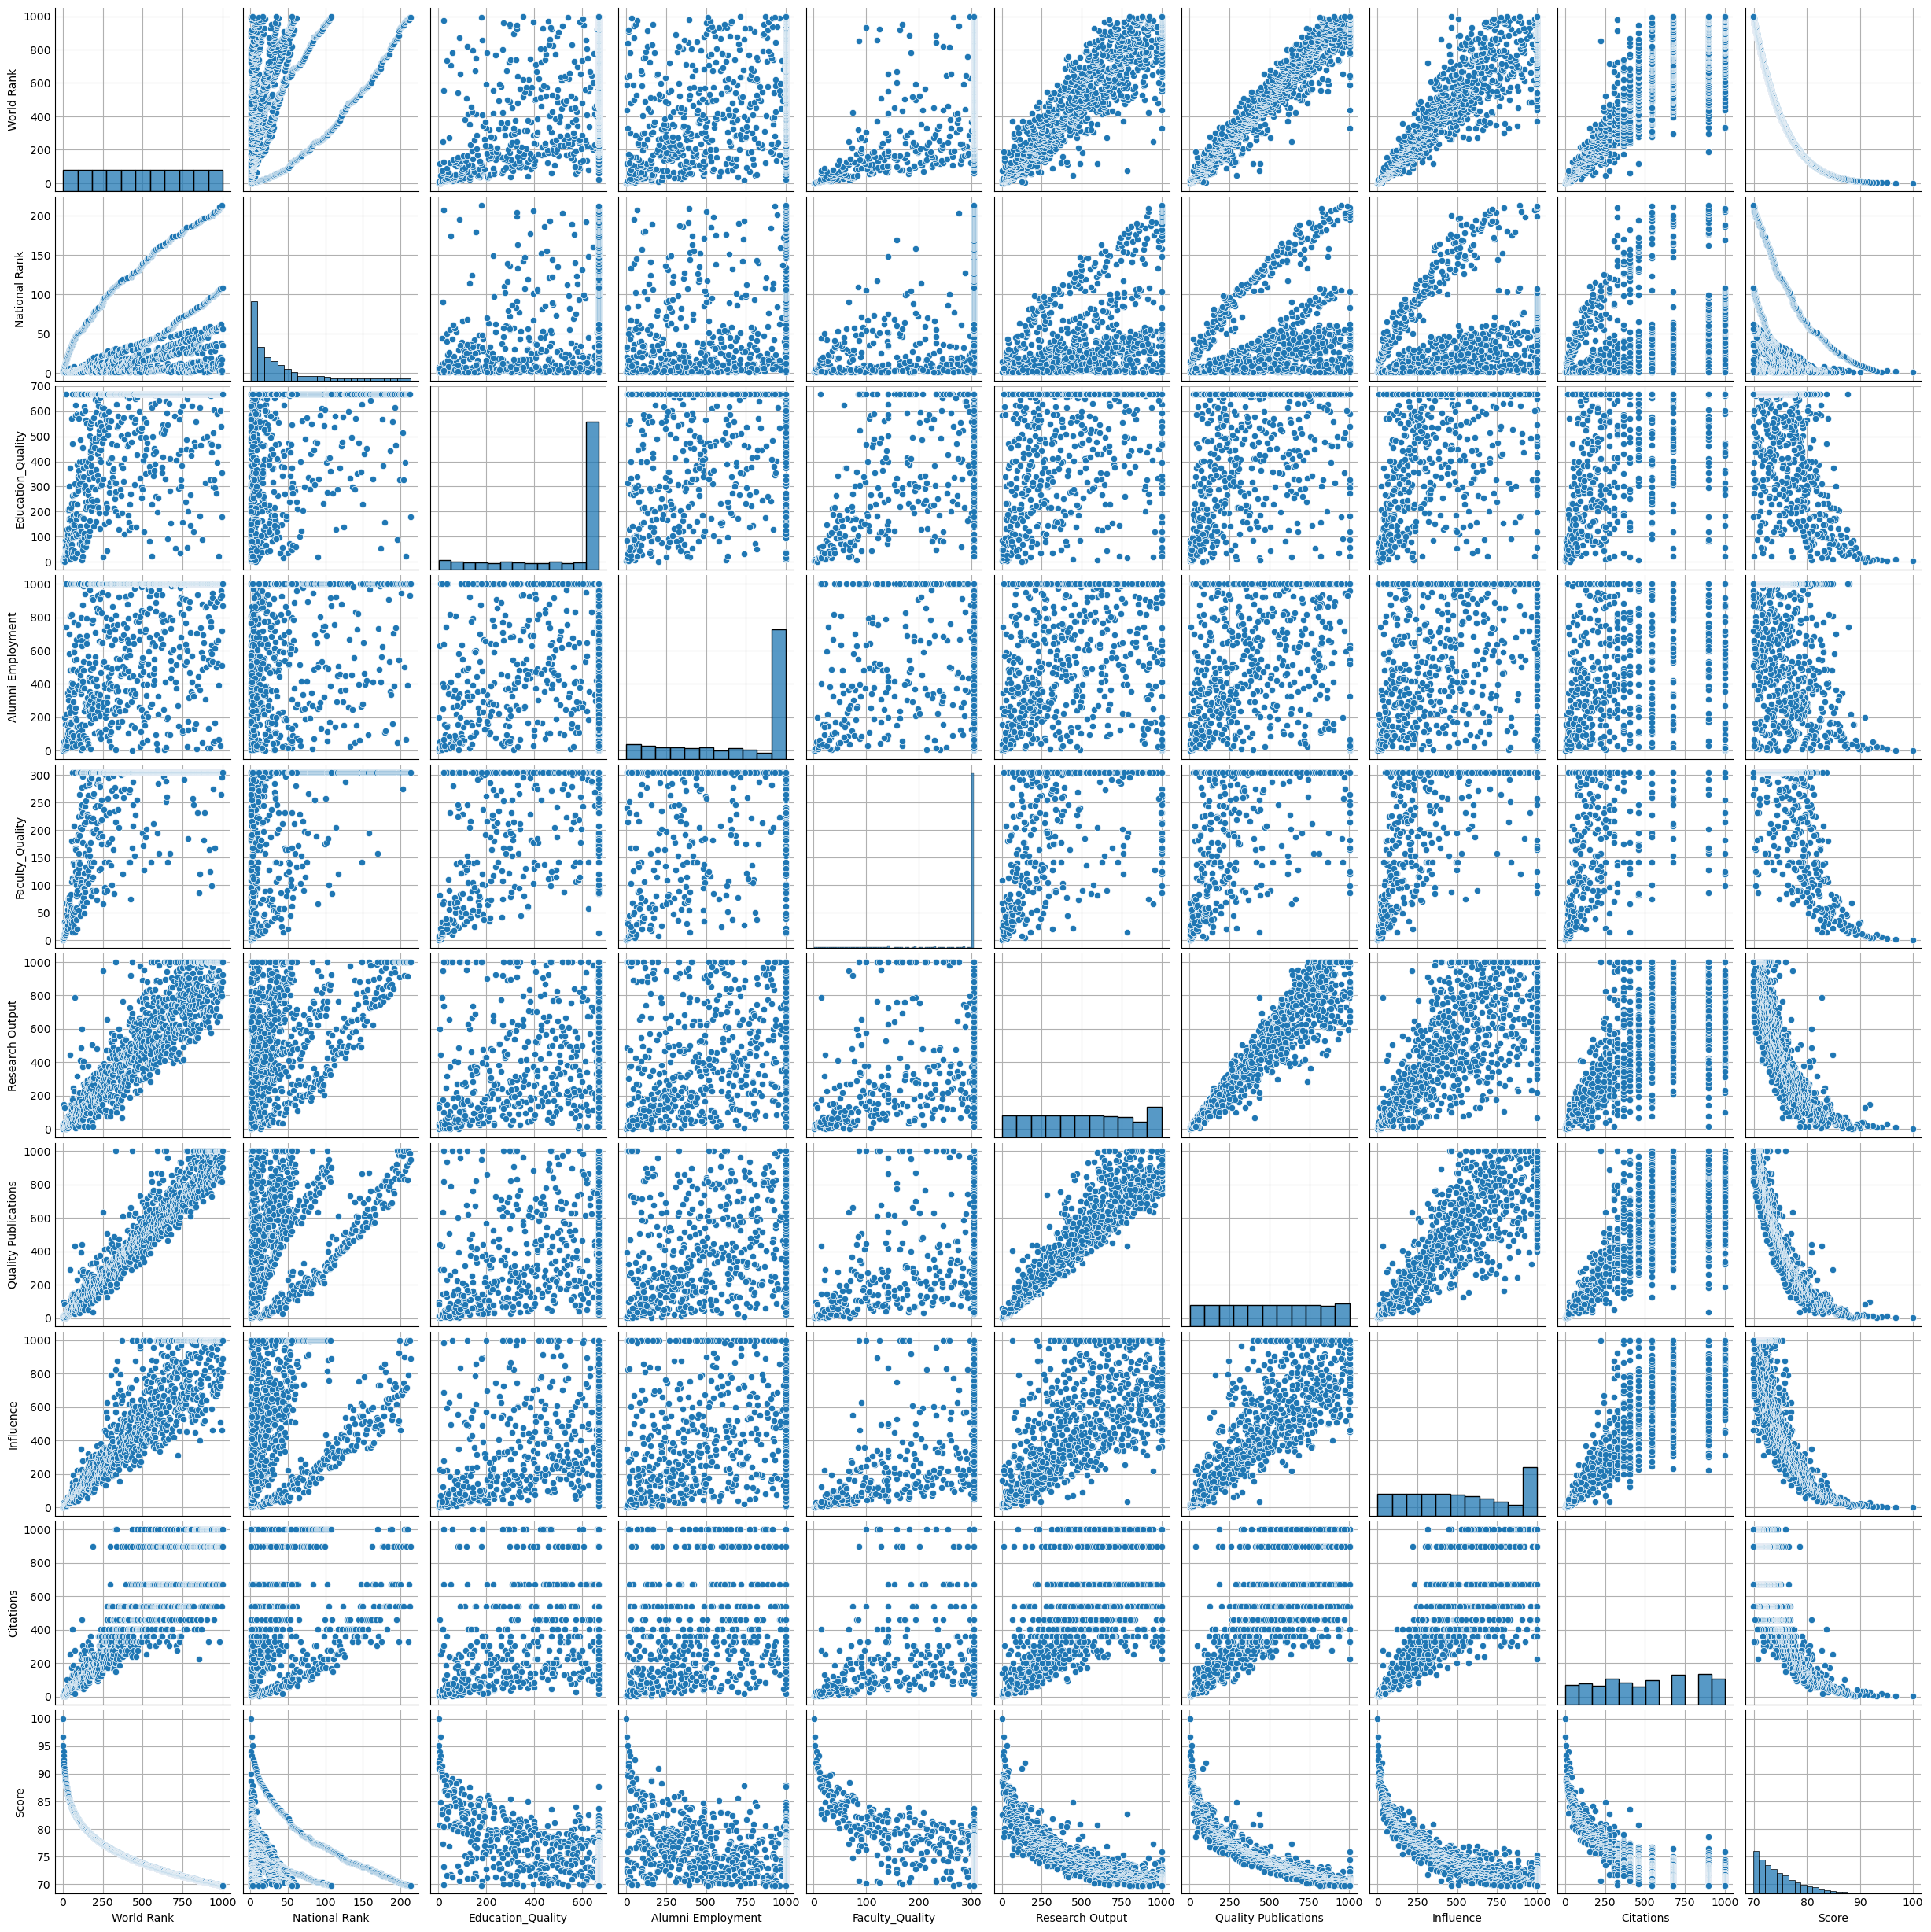

In [48]:
sns.pairplot(df_final)